In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기준 Malgun Gothic, Mac은 AppleGothic으로 변경)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 파일 읽기 (인코딩 자동 처리)
try:
    df_raw = pd.read_csv('new_data/신용카드사용액(2003.1~) (1).csv', encoding='utf-8-sig')
except:
    df_raw = pd.read_csv('new_data/신용카드사용액(2003.1~) (1).csv', encoding='cp949')

In [10]:
# 데이터 구조 변환
# 6번째 열(index 5)부터 날짜 데이터('Jan-03')가 시작됩니다.
dates = df_raw.columns[6:]
values = df_raw.iloc[0, 6:].values

In [13]:
# 데이터프레임 생성
df = pd.DataFrame({'card_spending': values}, index=dates)

# 날짜 형식 변환 ('2003/01' -> '2003-01-01')
df.index = pd.to_datetime(df.index, format='%Y/%m')
df.index.name = 'date'

In [14]:
# 숫자 변환 (콤마 제거)
df['card_spending'] = df['card_spending'].astype(str).str.replace(',', '').astype(float)

# 날짜순 정렬
df = df.sort_index()

# 2004년 1월 1일 이후 데이터만 선택
df = df.loc['2004-01-01':]

In [15]:
# 숫자 변환
df['card_spending'] = pd.to_numeric(df['card_spending'])

In [16]:
# 로그 변환
df['log_val'] = np.log(df['card_spending'])

In [17]:
# 전년 동월 대비 성장률 (12개월 차분)
df['12m_log_return'] = df['log_val'].diff(12)

In [18]:
# Z-Score 계산 (2005년 이후 데이터 기준 통계)
# 결측치(2004년)를 제외한 2005년 이후 데이터로 평균/표준편차 계산
valid_data = df['12m_log_return'].dropna()
mean_val = valid_data.mean()
std_val = valid_data.std()

df['z_score'] = (df['12m_log_return'] - mean_val) / std_val

In [19]:
# 결측치(2004년) 제거 -> 2005년부터의 데이터만 남음
df_final = df.dropna()

In [20]:
# 저장
df_final.to_csv('new_data/new_data_z_score/(사용액)신용카드_Z_Score_2005_2026.csv', encoding='utf-8-sig')
print("파일이 'new_data/new_data_z_score/(사용액)신용카드_Z_Score_2005_2026.csv'로 저장되었습니다.")

파일이 'new_data/new_data_z_score/(사용액)신용카드_Z_Score_2005_2026.csv'로 저장되었습니다.


In [23]:
# 결과 확인
print(df[['card_spending', '12m_log_return', 'z_score']].tail())

            card_spending  12m_log_return   z_score
date                                               
2025-07-01     94958632.0        0.053026 -0.025623
2025-08-01     91516719.0        0.033531 -0.427084
2025-09-01     95364571.0        0.067959  0.281906
2025-10-01     92592210.0        0.016660 -0.774494
2025-11-01     93619698.0        0.044298 -0.205345


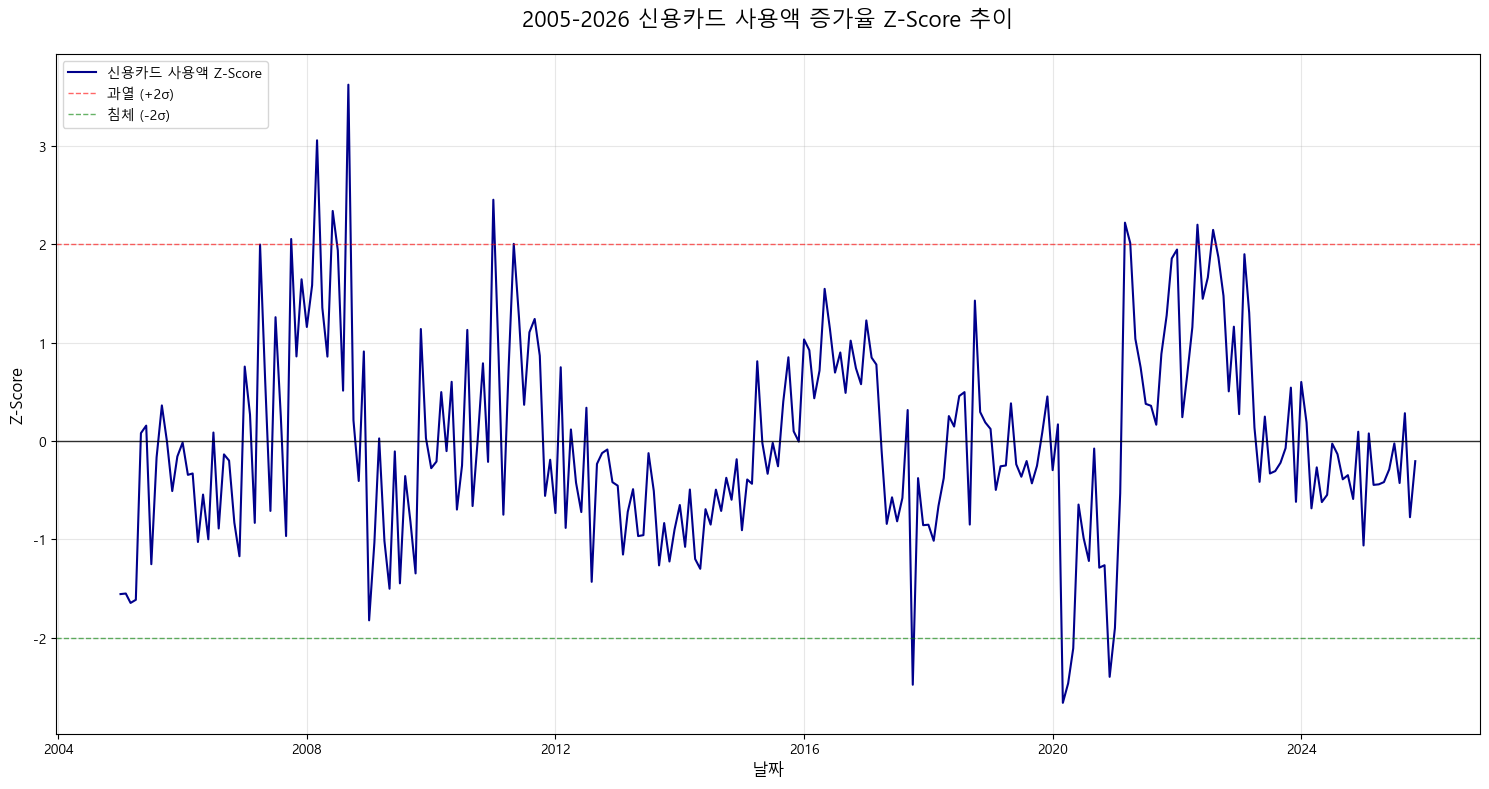

In [24]:
plt.figure(figsize=(15, 8))

# 2005년부터 2026년까지의 흐름 시각화
plt.plot(df_final.index, df_final['z_score'], label='신용카드 사용액 Z-Score', color='darkblue', linewidth=1.5)

# 기준선
plt.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.8)
plt.axhline(2, color='red', linestyle='--', linewidth=1, alpha=0.6, label='과열 (+2σ)')
plt.axhline(-2, color='green', linestyle='--', linewidth=1, alpha=0.6, label='침체 (-2σ)')

plt.title('2005-2026 신용카드 사용액 증가율 Z-Score 추이', fontsize=16, pad=20)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()